# Atividade Basica

Passeio aleatório (implementação básica). Considere um passeio aleatório unidimensional, onde a cada instante de tempo o caminhante dá um passo uma unidade para a direita ou para a esquerda com probabilidades p e 1 − p , respectivamente. O passeio termina depois de N = 1000 passos. Faça um gráfico da posição do caminhante em função do número de passos (que representa o tempo). Use p = 0.5 e p = 0.8 . Implemente na forma de uma função que receba como argumento o número de passos N e a probabilidade p , e retorne um array com a posição do caminhante em cada passo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def random_walk(n,p):
    
    rng = np.random.default_rng()

    lista = rng.choice(a=[-1,1],size=n,p=[1-p, p])
    caminho = np.cumsum(lista)
    tempo = np.arange(0,n,1)
    return caminho, tempo




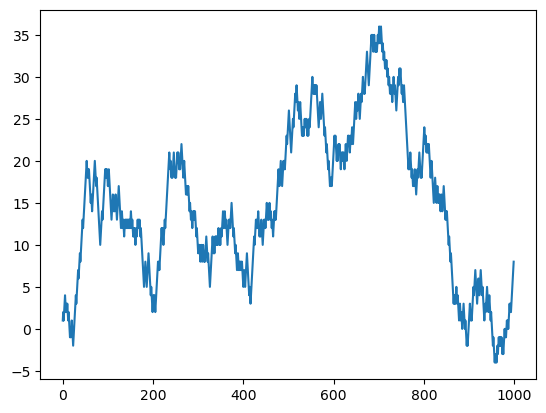

In [70]:

y,x = random_walk(1000,0.5)
plt.plot(x,y)

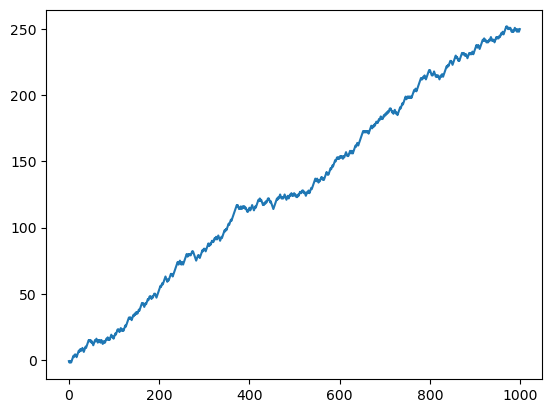

In [71]:

y,x = random_walk(1000,0.6)

plt.plot(x,y)

Passeio aleatório (repetição). Rode o código acima 100 vezes para um valor fixo p e faça o gráfico conjunto de todos os passeios. Use p = 0.5 e p = 0.8 . O que observa?

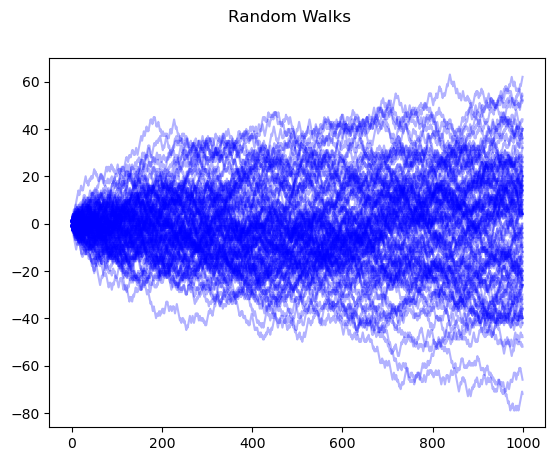

In [72]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.5)
    ax.plot(x,y,color='blue', alpha=0.3)
fig.suptitle('Random Walks')
plt.show()

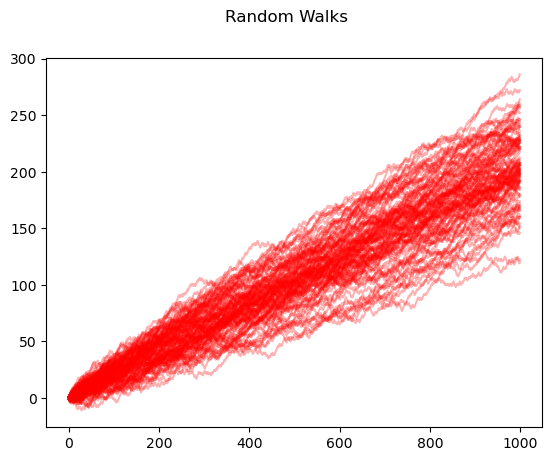

In [73]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.6)
    ax.plot(x,y,color='red',alpha=0.3)
fig.suptitle('Random Walks')
plt.show()

# Atividade Intermediaria

Passeio aleatório (médias). Calcule a média e o desvio padrão da posição do caminhante em função do número de passos. Faça um gráfico da média e do desvio padrão em função dos passos. Use p = 0.5 e p = 0.8 .

In [74]:
import numpy as np
def desvio(X):

    m = len(X)
    x = np.median(X ,axis=0)
    deltax = []
    for i in range(m):
        deltax.append((x-X[i])**2)
    desvio = (np.sum(deltax,axis=0)/(m-1))**(1/2)
    
    return np.array(desvio) , np.array(x)



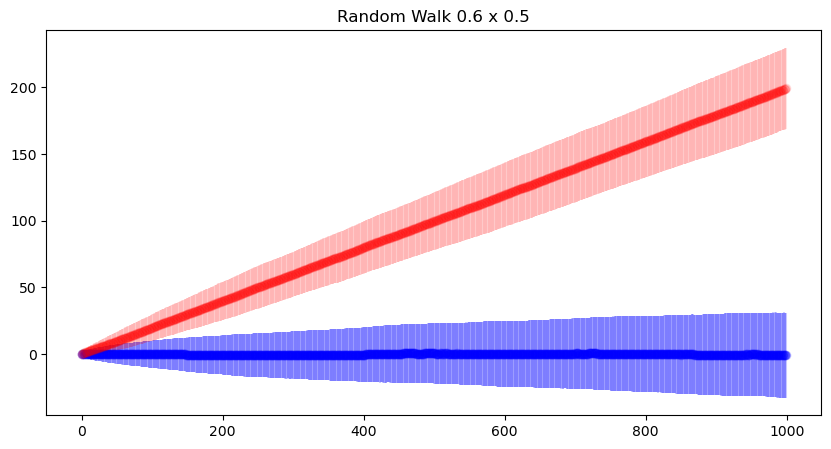

In [5]:
import matplotlib.pyplot as plt
import numpy as np
Y1 = []
Y2 = []

x = np.arange(0,1000,1)
for i in range(1000):
    y2 , _ = random_walk(1000,0.6)
    Y2.append(y2)

for i in range(1000):
    y1 , _ = random_walk(1000,0.5)
    Y1.append(y1)

np.save('Y1.npy',Y1)
np.save('Y2.npy',Y2)

desvioy1 = np.std(Y1,axis=0)
desvioy2 = np.std(Y2,axis=0)
y1 = np.mean(Y1,axis=0)
y2 = np.mean(Y2,axis=0)


fig3 , ax3 = plt.subplots(figsize=(10,5))

ax3.errorbar(x=x,y=y1,yerr=desvioy1,xerr=0,alpha=0.2,fmt='o',color ='Blue')

ax3.errorbar(x=x,y=y2,yerr=desvioy2,xerr=0,alpha=0.1,fmt='o',color ='Red')

ax3.set_title('Random Walk 0.6 x 0.5')
plt.show()

Passeio aleatório (histograma 1). Usando os dados do exercício 2, faça histogramas da posição do caminhante no inicio, no meio e no final do passeio. Plote os 3 histogramas no mesmo gráfico. Veja se o resultado condiz com o observado no exercício 2.

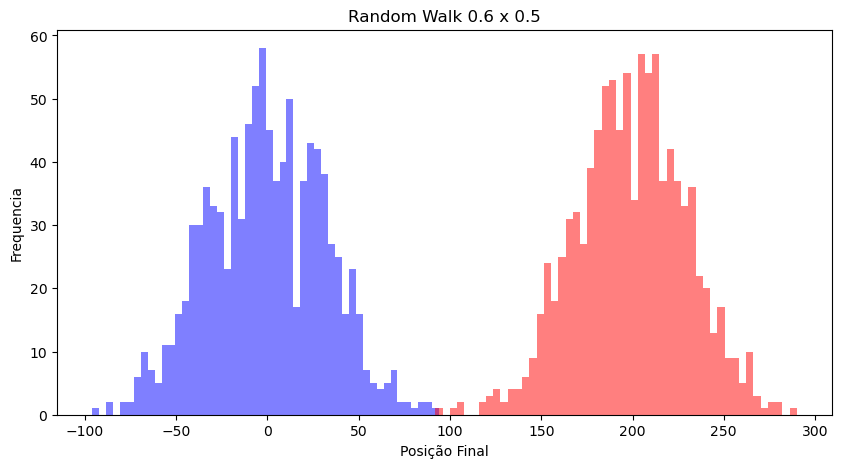

In [7]:
# Plotando os histogramas
Y1 = np.load('Y1.npy')
Y2 = np.load('Y2.npy')

fig4 , ax4 = plt.subplots(figsize=(10,5))
Y1 = np.array(Y1)
Y2 = np.array(Y2)
Pontos_1 = Y1[:,-1]
Pontos_2 = Y2[:,-1]
ax4.hist(Pontos_1, bins=50, alpha=0.5, color='blue', label='p=0.5')
ax4.hist(Pontos_2, bins=50, alpha=0.5, color='red', label='p=0.6')
ax4.set_xlabel('Posição Final')
ax4.set_title('Random Walk 0.6 x 0.5')
ax4.set_ylabel('Frequencia')
plt.show()


# Atividade avançada

Passeio aleatório (histograma). Usando os dados do exercício 2, faça um histograma da posição do caminhante em cada passo. Faça um gráfico de mapa de cores da evolução do histograma usando plt.imshow, plt.pcolormesh, ou tente fazer gráficos 3D. Se optar por fazer gráficos 3D, recomendo usar a biblioteca plotly, pois gráficos 3D no matplotlib não ficam bons.

In [9]:
#%pip install plotly
import plotly.graph_objects as go
import numpy as np


def histogram_3d(lista):
    '''
    Cria um histograma 3D a partir de uma lista de dados.
    Parâmetros:
        lista: Lista de dados a serem plotados.
    Retorna:
        histogram_3d: Histograma 3D dos dados.

    '''
    N = len(lista)
    bins = 50
    dados = np.array(lista)

    # Verifica se Y1 e Y2 têm o mesmo número de colunas
    if dados.shape[1] != dados.shape[1]:
        raise ValueError("Y1 and Y2 must have the same number of columns")

    # Cria uma grade para o histograma 3D
    histogram_3d = np.zeros((N, bins))

    # Preenche o histograma 3D
    for step in range(N):
        step_positions = dados[:, step]
        hist, bin_edges = np.histogram(step_positions, bins=bins, range=(dados.min(), dados.max()))
        histogram_3d[step, :] = hist
    
    x = np.arange(N)  # Passos
    y = np.linspace(dados.min(), dados.max(), bins)  # Posições
    
    return  x, y, histogram_3d

Y1 = np.load('Y1.npy')
Y2 = np.load('Y2.npy')

y2 ,x2 , z2 = histogram_3d(Y2)
# Cria o gráfico 3D

fig2 = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2, colorscale='turbo')])
fig2.update_layout(
    title="Histograma 3D do Passeio Aleatório",
    scene=dict(
        xaxis_title="Passos",
        yaxis_title="Posição",
        zaxis_title="Frequência"
    )
)


y1 ,x1 ,z1 = histogram_3d(Y1)
fig1 = go.Figure(data=[go.Surface(z=z1, x=x1, y=y1, colorscale='turbo')])
fig1.update_layout(
    title="Histograma 3D do Passeio Aleatório",
    scene=dict(
        xaxis_title="Passos",
        yaxis_title="Posição",
        zaxis_title="Frequência"
    )
)
fig2.show()
fig1.show()

